<h2> Use Pandas to import the data from `epa-sea-level.csv`</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df_1880_to_2013 = pd.read_csv('epa-sea-level.csv',float_precision="legacy")
df_1880_to_2013

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


<h2> Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis. </h2>

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'CSIRO Adjusted Sea Level')]

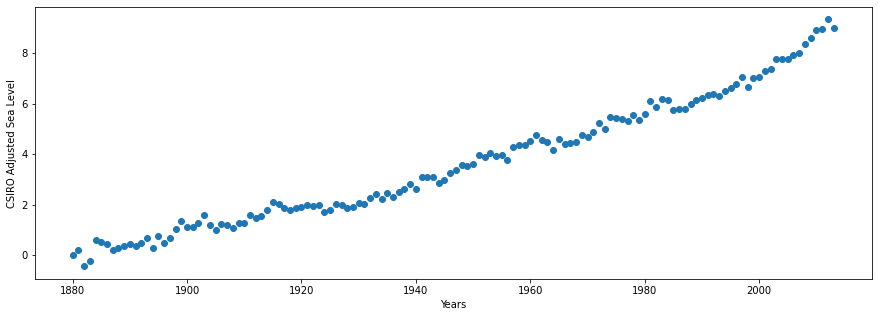

In [3]:
fig ,ax = plt.subplots(figsize = (15,5))
x = df_1880_to_2013['Year']
y = df_1880_to_2013['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Years", ylabel = "CSIRO Adjusted Sea Level")

<h2>Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit.</h2>
<h2>Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2013 to predict the sea level rise in 2013.</h2>

In [4]:
result = linregress(df_1880_to_2013['Year'], df_1880_to_2013['CSIRO Adjusted Sea Level'])
result

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)

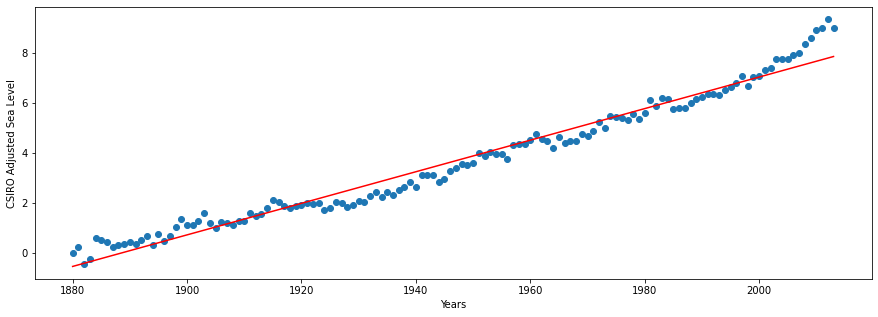

In [5]:
fig ,ax = plt.subplots(figsize = (15,5))
x = df_1880_to_2013['Year']
y = df_1880_to_2013['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Years", ylabel = "CSIRO Adjusted Sea Level")
ax.plot(df_1880_to_2013['Year'],result.slope*df_1880_to_2013['Year']+ result.intercept,'r')

<h2>Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.</h2> 
<h2>Make the line also go through the year 2013 to predict the sea level rise in 2013 if the rate of rise continues as it has since the year 2000.</h2>
<h2> 
The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level"</h2>

In [6]:
df_2000_to_2013 = df_1880_to_2013[df_1880_to_2013['Year'] >= 2000]
df_2000_to_2013

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [7]:
result_1 = linregress(df_2000_to_2013['Year'], df_2000_to_2013['CSIRO Adjusted Sea Level'])
result_1

LinregressResult(slope=0.16642727333186808, intercept=-325.79346680596467, rvalue=0.976287571614062, pvalue=2.4388064141616947e-09, stderr=0.010652933111541106)

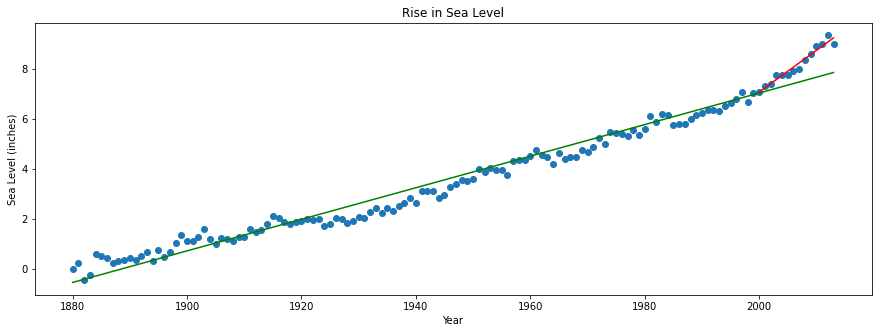

In [8]:
fig ,ax = plt.subplots(figsize = (15,5))
x = df_1880_to_2013['Year']
y = df_1880_to_2013['CSIRO Adjusted Sea Level']
ax.scatter(x,y)
ax.set(xlabel = "Year", ylabel = "Sea Level (inches)", title ="Rise in Sea Level")
ax.plot(df_1880_to_2013['Year'],result.slope*df_1880_to_2013['Year']+ result.intercept,'g')
ax.plot(df_2000_to_2013['Year'],result_1.slope*df_2000_to_2013['Year']+ result_1.intercept,'red')

<h2> For predictions till 2050 </h2>

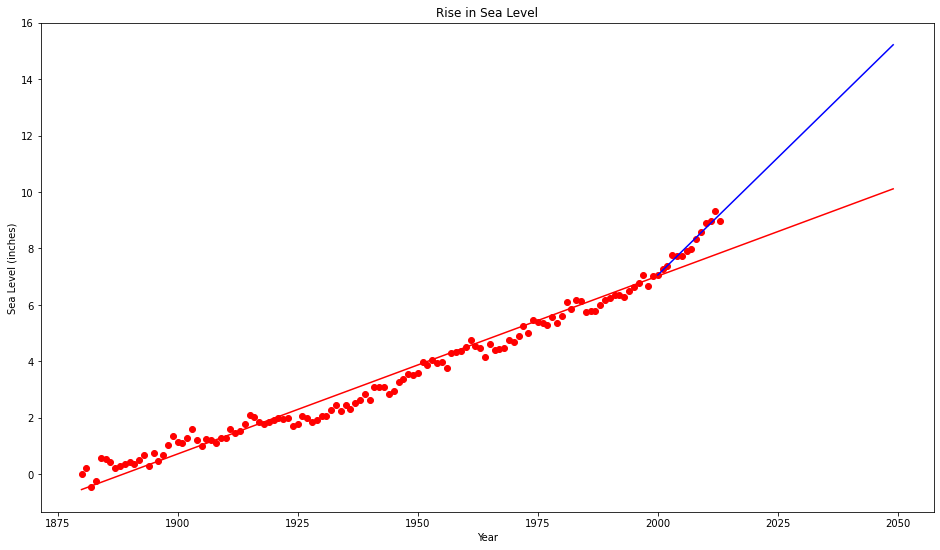

In [11]:
df = pd.read_csv("epa-sea-level.csv", float_precision="legacy")
plt.figure(1, figsize=(16, 9))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], c= "r")
regress = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
last_year = df["Year"].max()
df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
plt.plot(df["Year"],regress.intercept + regress.slope * df["Year"],c="r",label="fit all")
df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2050)])
plt.plot(df_recent["Year"],bestfit.intercept + bestfit.slope * df_recent["Year"],c="b",label="fit recent")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")
plt.gca()
plt.savefig('sea_level_plot.png')

In [10]:
def draw_plot():
    # Read data from file
    df = pd.read_csv("epa-sea-level.csv", float_precision="legacy")

    # Create scatter plot
    plt.figure(1, figsize=(16, 9))
    plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], c= "r")

    # Create first line of best fit
    regress = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    last_year = df["Year"].max()
    df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
    plt.plot(df["Year"],regress.intercept + regress.slope * df["Year"],c="r",label="fit all")

    # Create second line of best fit
    df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
    bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
    df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2050)])
    plt.plot(df_recent["Year"],bestfit.intercept + bestfit.slope * df_recent["Year"],c="b",label="fit recent")

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()